In [11]:
import pandas as pd

# Load dataset from local CSV file
df = pd.read_csv('/content/AirPassengers.csv')

# Fix column names regardless of CSV format
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

data = df['Passengers']

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will conta

AR(1) AIC: 1078.0541689165111
AR(3) AIC: 1050.4728998359697


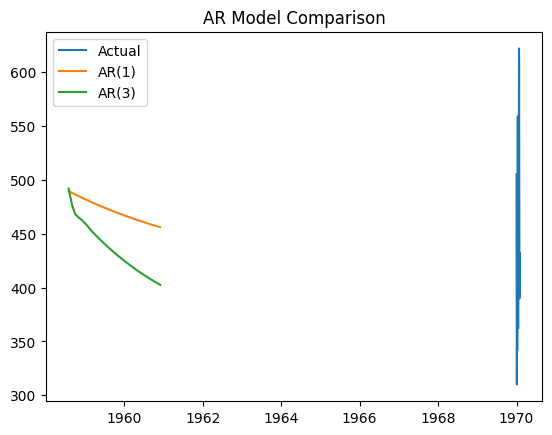

In [14]:
#============================================================================
# LAB 7: AR MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# i. Examine ACF and PACF (already plotted above)
# PACF cuts off at lag p → AR(p) model

# ii. Fit AR(1) model
ar1_model = AutoReg(train, lags=1).fit()
ar1_pred = ar1_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(1) AIC: {ar1_model.aic}")

# iii. Fit higher lag AR models
ar3_model = AutoReg(train, lags=3).fit()
ar3_pred = ar3_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(3) AIC: {ar3_model.aic}")

plt.plot(test.values, label='Actual')
plt.plot(ar1_pred, label='AR(1)')
plt.plot(ar3_pred, label='AR(3)')
plt.legend()
plt.title('AR Model Comparison')
plt.show()